# Credit Card Fraud Detection using Machine Learning

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
credit_card_data = pd.read_csv('creditcard.csv')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_card_data.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
155143,104589.0,1.920049,0.652126,-0.765624,3.741624,0.69216,0.112676,0.087599,-0.090481,0.001516,...,0.108366,0.512441,0.032751,-0.483119,0.081307,0.101433,-0.078039,-0.073371,6.44,0


In [4]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
credit_card_data.shape

(284807, 31)

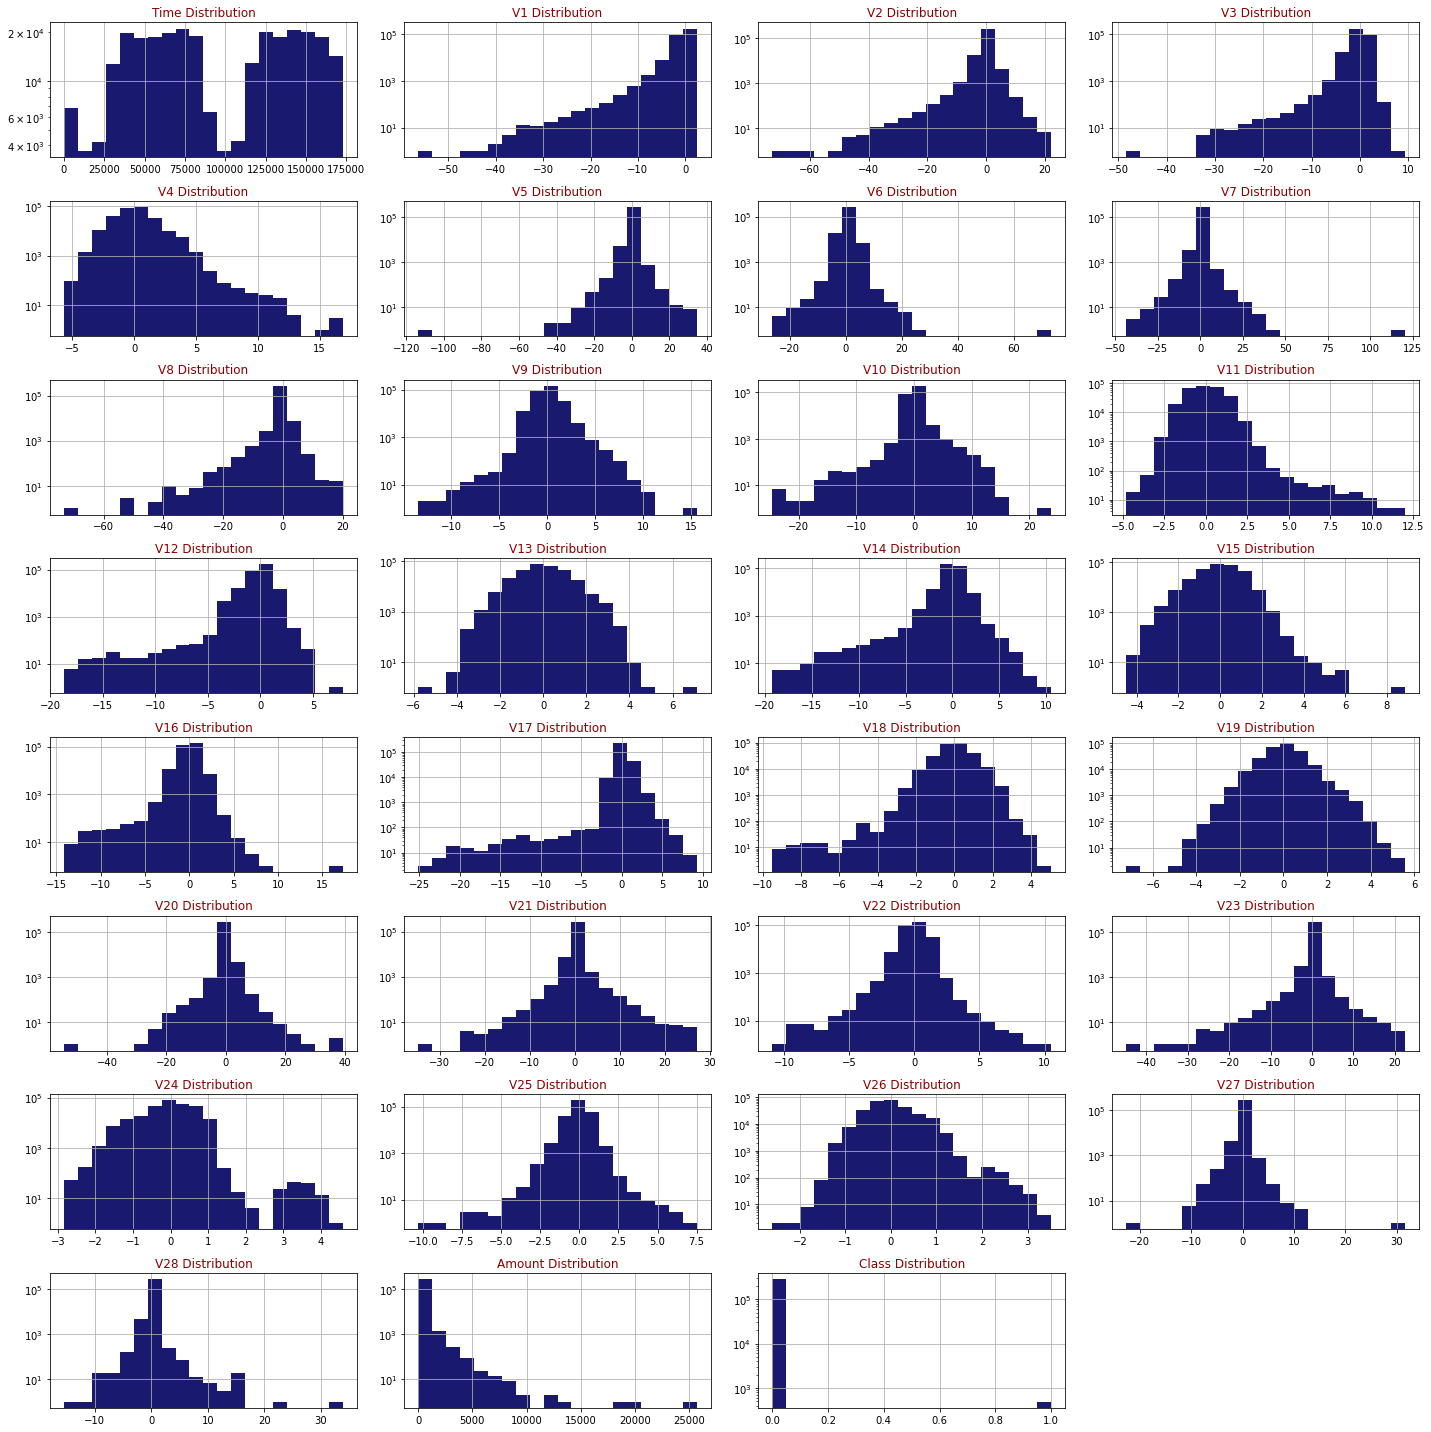

In [7]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(credit_card_data,credit_card_data.columns,8,4)

In [8]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

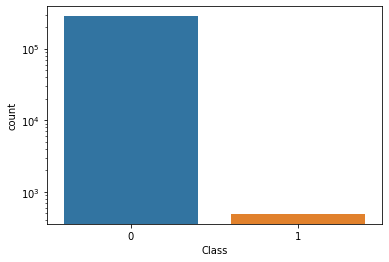

In [9]:
ax=sns.countplot(x='Class',data=credit_card_data);
ax.set_yscale('log')

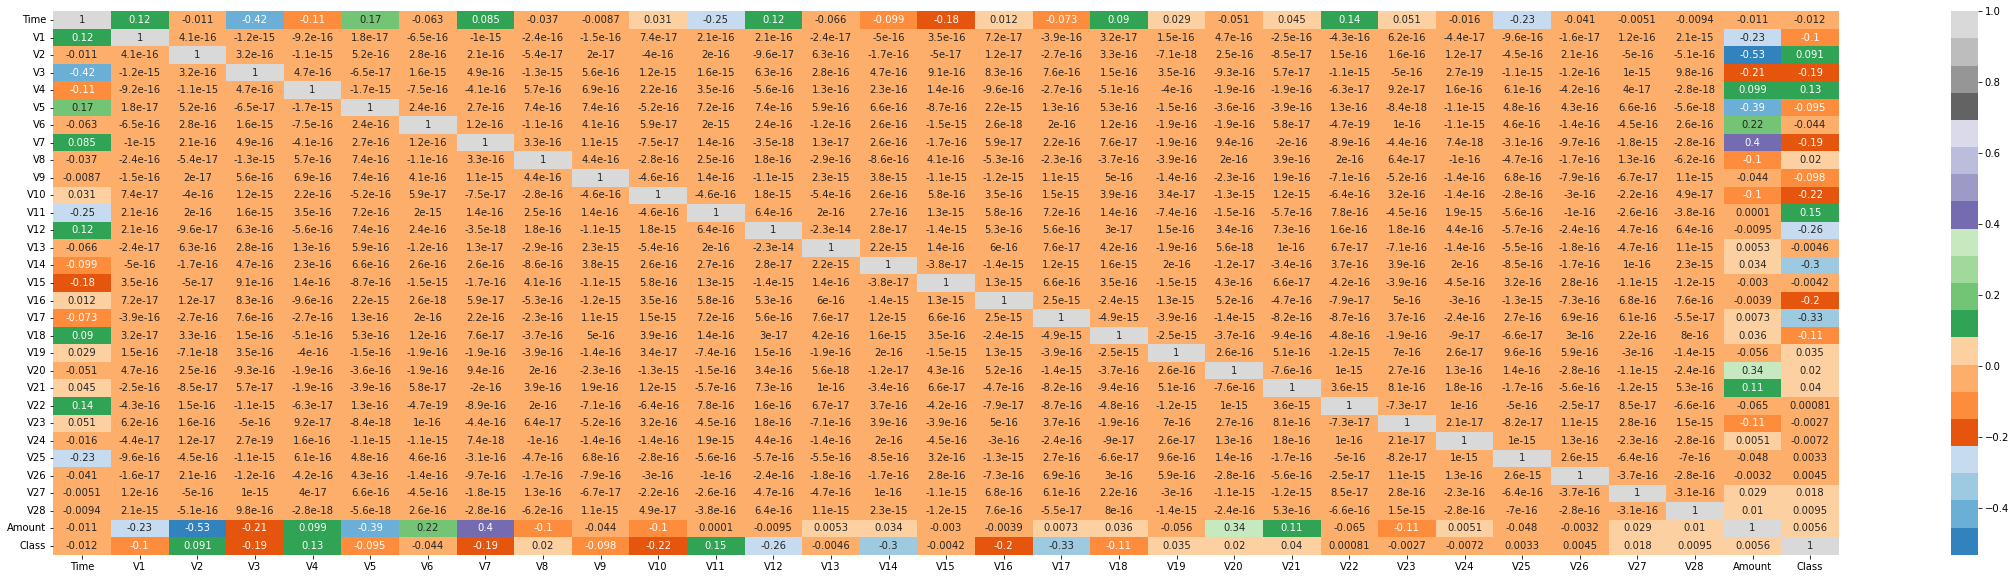

In [10]:
#Correlation Matrix
plt.figure(figsize = (40,10))
sns.heatmap(credit_card_data.corr(), annot = True, cmap="tab20c")
plt.show()

In [11]:
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data['Class']==1]

In [12]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

In [13]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
legit_sample = legit.sample(n=492)

In [16]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [17]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
209676,137659.0,-0.254232,-0.066206,-0.525570,0.838020,1.251786,-0.900556,-0.143065,-0.121162,0.427828,...,0.241495,1.186386,-0.258240,-0.340701,-1.053684,-0.312517,0.373453,0.277811,11.68,0
106478,69981.0,-0.601634,1.603710,1.087927,2.677122,0.018995,0.438760,0.066918,0.706659,-1.745202,...,0.203559,0.588098,-0.034154,0.015822,-0.548234,0.216074,0.300409,0.157043,0.00,0
63095,50550.0,-0.748772,-1.310191,2.447122,-1.370102,-1.408728,1.492636,-0.131476,0.331398,0.239250,...,-0.225126,0.069773,0.390551,-0.248379,-0.652653,0.923580,-0.067725,-0.065380,206.73,0
76331,56517.0,-0.842758,1.138347,0.856933,-0.093563,0.029331,0.249413,0.126653,0.807497,-0.747101,...,-0.108478,-0.407046,0.145616,-0.358348,-0.325883,0.117581,0.138283,0.019269,24.99,0
193561,130186.0,1.971412,0.058097,-1.893070,0.387698,0.342117,-1.027071,0.203680,-0.228737,0.370341,...,0.238951,0.748569,-0.101486,-0.411392,0.248018,-0.104062,-0.012742,-0.036795,36.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [18]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [19]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96769.069106,0.007558,0.160323,-0.029528,-0.007556,0.081010,0.038253,-0.047779,0.100325,-0.005283,...,-0.003925,-0.016030,0.025139,0.005773,0.003768,0.019180,0.009483,0.008992,-0.010741,62.025061
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [67]:
credit_card_data.shape

(284807, 31)

In [69]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [70]:
#Dropping Time as it's non business required data
estimators=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

X1 = credit_card_data[estimators]
y = credit_card_data['Class']

In [71]:
col=X1.columns[:-1]
col

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [72]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.003919
         Iterations 13


In [73]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284777
Method:                           MLE   Df Model:                           29
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                  0.6918
Time:                        20:24:41   Log-Likelihood:                -1116.1
converged:                       True   LL-Null:                       -3621.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7304      0.151    -57.654      0.000      -9.027      -8.434
V1             0.0837      0.042      2.016      0.044       0.002       0.165
V2             0.0130      0.058      0.226      0.822      -0.100       0.126
V3             0.0384      0.045      0.845      0.398      -0.051       0.128
V4             0.7059      0.074      9.578      0.000       0.561       0.850
V5             0.1020      0.065      1.559      0.119      -0.026       0.230
V6            -0.1229      0.076     -1.621      0.105      -0.271       0.026
V7            -0.1107      0.066     -1.674      0.094      -0.240       0.019
V8            -0.1683      0.031     -5.511      0.000      -0.228      -0.108
V9            -0.2609      0.110     -2.375      0.018      -0.476      -0.046
V10           -0.8188      0.097     -8.439      0.000      -1.009      -0.629
V11           -0.0123      0.076     -0.162      0.871      -0.161       0.137
V12            0.0693      0.086      0.805      0.421      -0.099       0.238
V13           -0.3200      0.081     -3.937      0.000      -0.479      -0.161
V14           -0.5451      0.062     -8.843      0.000      -0.666      -0.424
V15           -0.0853      0.084     -1.016      0.310      -0.250       0.079
V16           -0.1936      0.125     -1.551      0.121      -0.438       0.051
V17            0.0024      0.069      0.035      0.972      -0.132       0.137
V18           -0.0373      0.128     -0.292      0.770      -0.287       0.213
V19            0.0764      0.096      0.797      0.425      -0.111       0.264
V20           -0.4473      0.082     -5.488      0.000      -0.607      -0.288
V21            0.3675      0.058      6.334      0.000       0.254       0.481
V22            0.5787      0.128      4.514      0.000       0.327       0.830
V23           -0.0901      0.057     -1.568      0.117      -0.203       0.023
V24            0.1384      0.149      0.928      0.353      -0.154       0.431
V25           -0.0449      0.129     -0.349      0.727      -0.297       0.207
V26           -0.0034      0.189     -0.018      0.986      -0.374       0.368
V27           -0.8052      0.123     -6.568      0.000      -1.045      -0.565
V28           -0.2943      0.089     -3.295      0.001      -0.469      -0.119
Amount         0.0009      0.000      2.458      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [75]:
#Feature Selection: Backward elemination (P-value approach)
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.0001):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(X,credit_card_data.Class,col)

In [76]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284779
Method:                           MLE   Df Model:                           27
Date:                Sun, 28 Apr 2024   Pseudo R-squ.:                    -inf
Time:                        20:28:46   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -3621.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V1            -3.8218      0.012   -314.141      0.000      -3.846      -3.798
V2             3.7765      0.012    309.690      0.000       3.753       3.800
V3            -8.5012      0.027   -318.673      0.000      -8.554      -8.449
V4             5.0093      0.016    312.841      0.000       4.978       5.041
V5            -5.8684      0.019   -313.694      0.000      -5.905      -5.832
V6            -2.0052      0.007   -271.662      0.000      -2.020      -1.991
V7           -11.0611      0.035   -318.170      0.000     -11.129     -10.993
V8             2.6385      0.009    284.203      0.000       2.620       2.657
V9            -5.4523      0.018   -309.421      0.000      -5.487      -5.418
V10          -12.6449      0.040   -318.589      0.000     -12.723     -12.567
V11            8.8430      0.028    315.792      0.000       8.788       8.898
V12          -15.9414      0.050   -319.225      0.000     -16.039     -15.844
V13            0.1941      0.005     37.623      0.000       0.184       0.204
V14          -16.4849      0.052   -319.253      0.000     -16.586     -16.384
V15           -0.3583      0.006    -62.870      0.000      -0.370      -0.347
V16          -14.9991      0.047   -318.332      0.000     -15.091     -14.907
V17          -27.2029      0.085   -320.058      0.000     -27.369     -27.036
V18          -10.1248      0.032   -315.045      0.000     -10.188     -10.062
V19            3.2932      0.012    273.533      0.000       3.270       3.317
V20            1.9872      0.009    210.731      0.000       1.969       2.006
V21            2.2782      0.010    231.542      0.000       2.259       2.297
V22            0.1845      0.007     25.923      0.000       0.171       0.198
V23           -0.1989      0.009    -21.774      0.000      -0.217      -0.181
V24           -0.1585      0.008    -18.771      0.000      -0.175      -0.142
V25            0.6190      0.010     59.316      0.000       0.598       0.639
V26            0.2025      0.011     18.946      0.000       0.182       0.223
V27            2.5278      0.016    158.026      0.000       2.496       2.559
V28            1.1526      0.015     74.650      0.000       1.122       1.183
==============================================================================
"""

In [77]:
#Interpreting the results: Odds Ratio, Confidence Intervals and Pvalues
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

     CI 95%(2.5%)  CI 95%(97.5%)    Odds Ratio  pvalue
V1   2.137203e-02   2.241594e-02  2.188776e-02     0.0
V2   4.263383e+01   4.472131e+01  4.366510e+01     0.0
V3   1.928651e-04   2.141256e-04  2.032175e-04     0.0
V4   1.451656e+02   1.545691e+02  1.497936e+02     0.0
V5   2.725565e-03   2.932947e-03  2.827355e-03     0.0
V6   1.327045e-01   1.366002e-01  1.346383e-01     0.0
V7   1.467636e-05   1.681908e-05  1.571123e-05     0.0
V8   1.374011e+01   1.424936e+01  1.399242e+01     0.0
V9   4.141032e-03   4.437174e-03  4.286546e-03     0.0
V10  2.982637e-06   3.484732e-06  3.223924e-06     0.0
V11  6.555886e+03   7.316495e+03  6.925757e+03     0.0
V12  1.081967e-07   1.315917e-07  1.193222e-07     0.0
V13  1.201998e+00   1.226554e+00  1.214214e+00     0.0
V14  6.262188e-08   7.667106e-08  6.929131e-08     0.0
V15  6.910661e-01   7.066802e-01  6.988296e-01     0.0
V16  2.791573e-07   3.357861e-07  3.061652e-07     0.0
V17  1.298946e-12   1.812527e-12  1.534398e-12     0.0
V18  3.762

In [82]:
new_features=credit_card_data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V20','V21', 'V22', 'V23', 'V25', 'V26', 'V27','Class']]
X=new_features.iloc[:,:-1]
Y=new_features.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,stratify=Y,random_state=42)

# Model Training

Logistic Regression

In [83]:
model=LogisticRegression()

In [84]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9992451008360947


In [85]:
# accuracy on test data
Y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9991573329588147


In [86]:
#Model accuracy
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



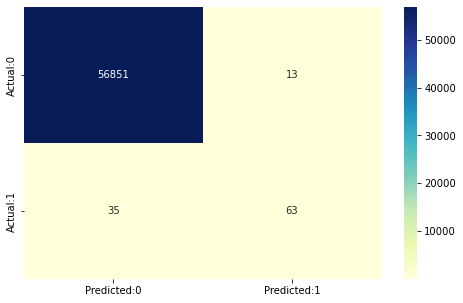

In [90]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_test_prediction)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [91]:
#Model Evaluation - Statistics
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [92]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =       ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy =                  ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) =       ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) =       ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) =               ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) =               ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =        0.9991573329588147 
 The Missclassification = 1-Accuracy =                   0.0008426670411852966 
 Sensitivity or True Positive Rate = TP/(TP+FN) =        0.6428571428571429 
 Specificity or True Negative Rate = TN/(TN+FP) =        0.9997713843556556 
 Positive Predictive value = TP/(TP+FP) =                0.8289473684210527 
 Negative predictive Value = TN/(TN+FN) =                0.9993847343810428 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  2811.956043956068 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.3572245242576459


In [95]:
y_pred_prob=model.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of Not Fraud (0)','Prob of Fraud (1)'])
y_pred_prob_df.head()

,Prob of Not Fraud (0),Prob of Fraud (1)
0,0.999919,0.000081
1,0.999966,0.000034
2,0.999993,0.000007
3,0.999870,0.000130
4,0.991990,0.008010


In [99]:
#Lower the threshold to increase sensitivity
from sklearn.preprocessing import binarize
for i in range(0,11):
    cm2=0
    y_pred_prob_yes=model.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(Y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.0 threshold the Confusion Matrix is  
 [[    0 56864]
 [    0    98]] 
 with 98 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.1 threshold the Confusion Matrix is  
 [[56831    33]
 [   22    76]] 
 with 56907 correct predictions and 22 Type II errors( False Negatives) 

 Sensitivity:  0.7755102040816326 Specificity:  0.9994196679797411 



With 0.2 threshold the Confusion Matrix is  
 [[56837    27]
 [   23    75]] 
 with 56912 correct predictions and 23 Type II errors( False Negatives) 

 Sensitivity:  0.7653061224489796 Specificity:  0.9995251828925155 



With 0.3 threshold the Confusion Matrix is  
 [[56839    25]
 [   29    69]] 
 with 56908 correct predictions and 29 Type II errors( False Negatives) 

 Sensitivity:  0.7040816326530612 Specificity:  0.9995603545301069 



With 0.4 threshold the Confusion Matrix is  
 [[56846    18]
 [   32    66]] 
 with 56912 correct predictions and 32 Type II errors( False Neg

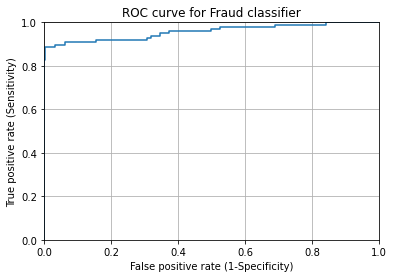

In [101]:
#Receiver Operating Characteristic(ROC) Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Fraud classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [103]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_pred_prob_yes[:,1])

0.9575054839043102